# サポートベクターマシン(SVM)

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 線形SVM分類器

In [27]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

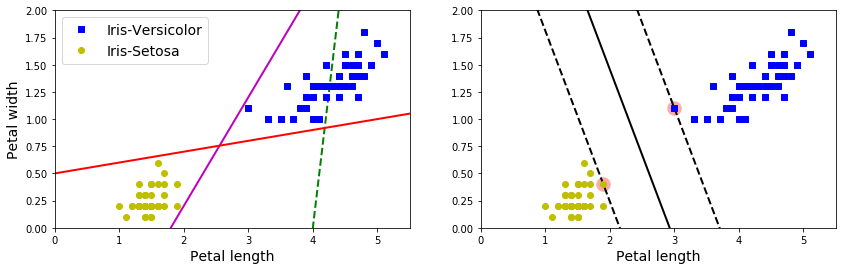

In [28]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.figure(figsize=(14, 4))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

左の図は3種類の線形分類器の境界を表している。破線の決定境界を持つモデルは性能が低く、クラスを正しく分類できていない。他の二つに対して完璧に分類を行うが、決定境界がインスタンスに近いため、新しいインスタンスに対して、同じような性能を発揮できないだろう  

それに対し右の図は、SVM分類器の決定協会を示している。この線は二つのクラスを分割できているだけではなく、もっとも近い訓練インスタンスからの距離が出来るだけ遠くなっている。SVN分類器はできる限り太い道を通すものだと考えられる。これを`マージンの大きい分類と呼ぶ。`

決定協会が道の端にあるインスタンスによって決まる(サポートされる)このようなインタンスのことを`サポートベクトル`と呼ぶ

### ソフトマージン分類
全てのインスタンスが道に引っかからず、正しく分類できることを厳密に要求する場合、それを`ハードマージン分類`と呼ぶ。ハードマージン分類には、データが線形分割できるときでなければ使用できず、外れ値に敏感になりずぎる問題がある。

これらの問題を避けるために、もっと柔軟性の高いモデルを使用した方が良い。目標は、道を限りなく太くすること、`マージン違反`を減らすことで間のバランスを取ること。これを`ソフトマージン分類と呼ぶ`

In [29]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [30]:
iris = datasets.load_iris()
X = iris['data'][:, (2, 3)] # 弁の長さ、花弁の幅
y = (iris['target'] == 2).astype(np.float64)

In [31]:
svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge")),
    ])
svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [32]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

## 非線形SVM分類器
線形SVM分類器は効率的で多くの条件で驚くほど素晴らしく機能するが、多くのデータセットは線形分割などとてもできない。

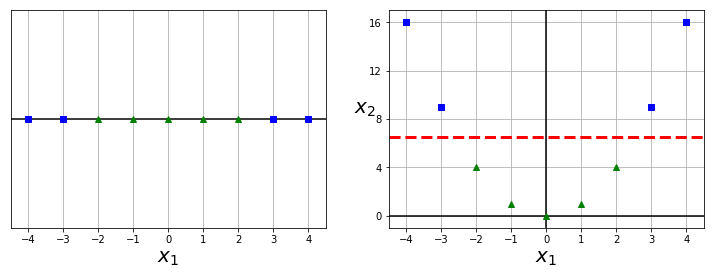

In [33]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

plt.show()

左の図は特徴量$x_1$のみを表しているがこれでは線形分割ができない  
しかし、第二の特徴量$x_2$を追加すると線形分割が可能となる

`scikit-learn`を使用してこの考えを実装するには`PloynomialFeatures`変換器と`StandardScaler`、`LinearSVC`を組み込んだ`Pipeline`を作成すれば良い  
これを`moon`データセットでテストしてみる

In [34]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

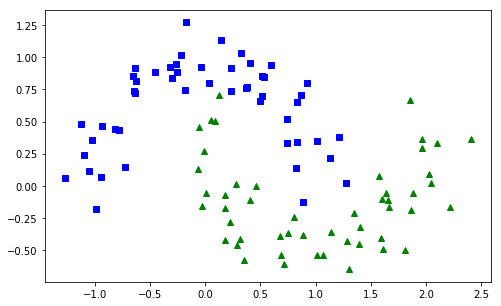

In [45]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

plt.figure(figsize=(8, 5))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")

In [46]:
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", max_iter=3000))
    ])

In [47]:
polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=3000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

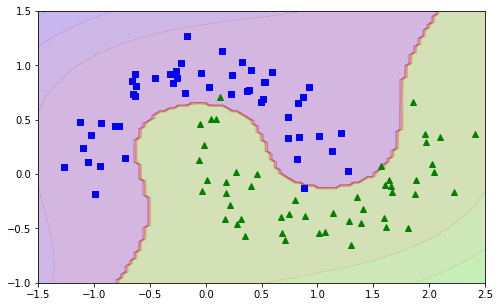

In [48]:
plt.figure(figsize=(8, 5))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")

axes = [-1.5, 2.5, -1, 1.5]
x0s = np.linspace(axes[0], axes[1], 100)
x1s = np.linspace(axes[2], axes[3], 100)
x0, x1 = np.meshgrid(x0s, x1s)
X = np.c_[x0.ravel(), x1.ravel()]
y_pred = polynomial_svm_clf.predict(X).reshape(x0.shape)
y_decision = polynomial_svm_clf.decision_function(X).reshape(x0.shape)
plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

### 多項式カーネル
多項式特徴量を追加するのは簡単に行え、あらゆる種類の機械学習のアルゴリズム(SVMに限らず)素晴らしく機能するが次元が低いと非常に複雑なデータセットは処理できず、次元が高いと特徴量が膨大な数になってモデルが遅くなる。  
しかしSVMを使用する場合は`カーネルトリック`を使用することができる。これを使用すると特徴量を追加せずにまるで多くの特徴量を追加したsかのような結果が得られる。

In [49]:
from sklearn.svm import SVC
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

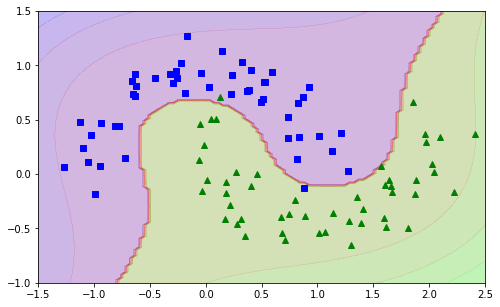

In [50]:
plt.figure(figsize=(8, 5))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")

axes = [-1.5, 2.5, -1, 1.5]
x0s = np.linspace(axes[0], axes[1], 100)
x1s = np.linspace(axes[2], axes[3], 100)
x0, x1 = np.meshgrid(x0s, x1s)
X = np.c_[x0.ravel(), x1.ravel()]
y_pred = poly_kernel_svm_clf.predict(X).reshape(x0.shape)
y_decision = poly_kernel_svm_clf.decision_function(X).reshape(x0.shape)
plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

### 類似性特徴量の追加
非線形問題に対するもう一つのテクニックとしては、個々のインスタンスが特定の`ランドマーク`にどの程度近いか測定する`類似性関数`で計算された値を特徴量として追加する。先ほど使用した1次元データをしようして、$x_1=-2$、$x_1=1$の二つのランドマークを追加する。  
次に、$\gamma=0.3$の`ガウス放射基底関数`になるように類似関数を定義する

ガウスRBF
\begin{equation}
\phi_\gamma(x, \ell) = exp(-\gamma  || x-\ell ||^2)
\end{equation}

In [51]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

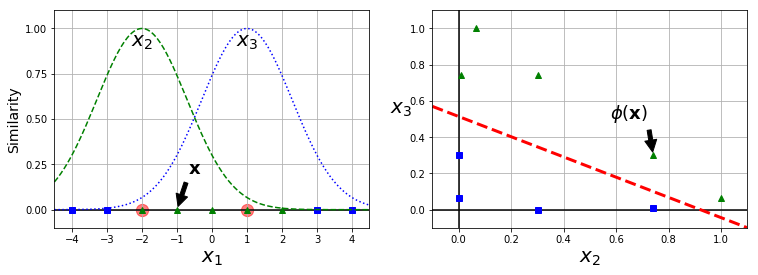

In [52]:
gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

これは0から1までのベル型関数である。例えば、$x_1=-1$のインスタンスを見ると、一つ目のランドマークまでの距離が`1`、二つ目のランドマークまでの距離が`2`である。よって新しい特徴量は$x_2 = exp(-0.3 ×1^2)　\approx 0.74$、　$x_3 = exp(-0.3 ×2^2)　\approx 0.3$となる

右のグラフは変換後のデータセットを示していて、線形分割可能となっている。

### ガウスRBFカーネル
多項式特徴量の方式と同様に、類似性特徴量の方式はどの機械学習アルゴリズムでも訓練セットが大きい場合は、追加した特徴量全てを計算していると計算にコストがかかってしまう。　しかし、SVMのカーネルトリックはここでも効果を発揮する。 類似性特徴量を追加しなくても、したかのように同じ結果が得られる。

In [54]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

In [59]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

## SVM回帰
SVMアルゴリズムは柔軟性が高い。線形・非線形分類をサポートするだけでなく回帰もサポートできる。  
SVM回帰はマージン違反を減らしながら道の中に入るインスタンスをできる限り多くなるようにする。道の太さは$\epsilon$によって調整される

In [60]:
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [61]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [62]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

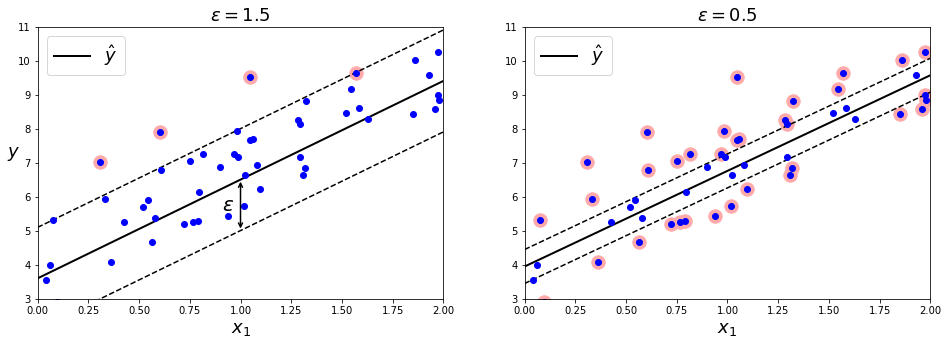

In [66]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(16, 5))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

In [67]:
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [68]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="auto")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="auto")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Text(0.5, 1.0, '$degree=2, C=0.01, \\epsilon = 0.1$')

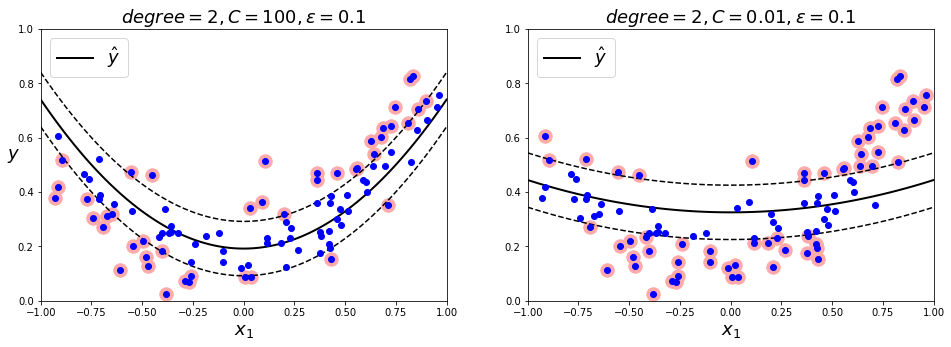

In [70]:
plt.figure(figsize=(16, 5))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)

非線形回帰にはカーネル化されたSVMモデルを使用する。  
左側のグラフはほとんど正規化されていない(Cの値が大きい)が右側のグラフかかなり正規化されている(Cの値が小さい)。

## 水面下で行われていること
前章(4章)では、全てのモデルのパラーメータを$\theta$というベクトルにまとめる方法を使用していた。  
バイアス項は$\theta_0$、入力特徴量は$\theta_1$から$\theta_n$までとし、全てのインスタンスのバイアスに$x_0=1$を加えていた。  
この章ではSVMを扱うときに便利な別の記法を使用する。バイアス項は$b$、特徴量の重みベクトルは$w$とする。そして、入力特徴量はバイアスを加算しない。

### 決定関数と予測
SVM分類器のモデルは、新しいインスタンス$x$をのクラス予測をするときに、決定関数の$w^T\cdot x + b = w_1x_1 + \cdot \cdot \cdot + b$を計算する。

\begin{equation}
\hat{y} = \begin{cases}
    0  \hspace{8pt} \rm{if} \hspace{8pt} w^T + b < 0 \\
    1  \hspace{8pt} \rm{if} \hspace{8pt} w^T + b >= 0 \\
    \end{cases}
\end{equation}